### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

### Reading csv file

In [2]:
admissions = pd.read_csv('admissions_data.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Inspecting Data

In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Labels and Features selection

In [5]:
features = admissions.iloc[:,:-1]
features.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [6]:
labels = admissions.iloc[:,-1]
labels.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

### Data split into training and testing sets

In [7]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

### Standardize Numerical features

In [8]:
numerical_features = features.select_dtypes(include = ['float64', 'int64'])
numerical_columns = numerical_features.columns

In [9]:
ct = ColumnTransformer([('scale', StandardScaler(), numerical_columns)], remainder = 'passthrough')

In [10]:
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

### Building the model

In [11]:
model = Sequential()

In [12]:
input = layers.InputLayer(input_shape = (features.shape[1], ))
model.add(input)

In [13]:
hidden_1 = layers.Dense(64, activation = 'relu')
model.add(hidden_1)
model.add(layers.Dropout(0.3))

hidden_2 = layers.Dense(24, activation = 'relu')
model.add(hidden_2)
model.add(layers.Dropout(0.2))

In [14]:
output = layers.Dense(1)
model.add(output)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


### Initializing the optimizer and compiling the model

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)

In [17]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
history = model.fit(features_train, labels_train, epochs = 50, batch_size = 4, verbose = 1, validation_split = 0.3, callbacks = [es])

Epoch 1/50
70/70 [==============================] - 3s 16ms/step - loss: 0.1390 - mae: 0.2758 - val_loss: 0.0423 - val_mae: 0.1796
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0335 - mae: 0.1492 - val_loss: 0.0210 - val_mae: 0.1214
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0199 - mae: 0.1110 - val_loss: 0.0071 - val_mae: 0.0702
Epoch 4/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0112 - mae: 0.0824 - val_loss: 0.0055 - val_mae: 0.0571
Epoch 5/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0081 - mae: 0.0712 - val_loss: 0.0052 - val_mae: 0.0534
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0073 - mae: 0.0673 - val_loss: 0.0057 - val_mae: 0.0607
Epoch 7/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0072 - mae: 0.0662 - val_loss: 0.0109 - val_mae: 0.0879
Epoch 8/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0076 - mae: 0.0

### Fit and evaluate the model

In [18]:
val_mse, val_mae = model.evaluate(features_test, labels_test, verbose = 0)

In [19]:
val_mse

0.00541345588862896

In [20]:
val_mae

0.05769990012049675

In [21]:
labels_predict = model.predict(features_test)

In [22]:
r2_score(labels_test, labels_predict)

0.7352833097981384

### Visualize MAE and Loss

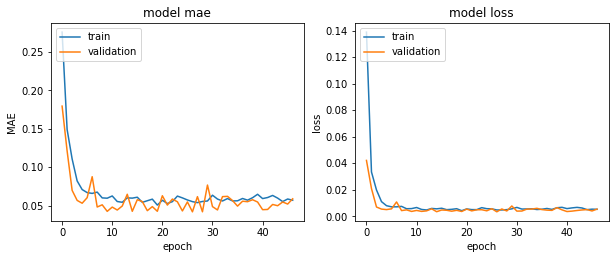

In [23]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')


plt.show()